In [1]:
import pandas as pd
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
import matplotlib as mpl
import glob, os

In [2]:
def angleCorloredTrajectory(x_gauss, y_gauss, circ_r, angle):
    
    plt.style.use('default')
    
    
    fig = plt.figure()
    ax = plt.gca()
    ax.set_facecolor('black')

    c1 = plt.Circle((0, 0), circ_r, facecolor='linen', alpha = 0.7, 
                    edgecolor='none', zorder = -3)
    ax.add_artist(c1)

    plt.scatter(x_gauss, y_gauss, s=7 , c = angle, cmap = plt.cm.cool, 
               zorder = 1)
    ax.set_aspect('equal', adjustable = 'datalim')
    ax.tick_params(axis = 'both',
                which = 'both',
                bottom = False,
                left = False,
                labelbottom = False,
                  labelleft = False)
    # add this line for representative plots
#     ax.set_ylim(-0.5,2.5)
    
    cbar = plt.colorbar()
    
    return(fig)

def angleColoredSweepCurves(r_gauss, circ_r, angle):
    fig = plt.figure(figsize = (5,5))
    ax = plt.gca()
    t0 = np.arange(len(r_gauss))*1/100
    plt.scatter(t0, r_gauss, s = 10,
                c = angle, cmap = plt.cm.jet)
    # add these lines for representative plots
#     plt.xlim(-circ_r*2.5, circ_r*2.5)
#     plt.ylim(-circ_r*2.5, circ_r*2.5)
    
    cbar = plt.colorbar()
    return(fig)

In [3]:
visitnum = ['FirstVisit/', 'LaterVisit/', 'LastVisit/']
for visit in visitnum[-1:]:
    direc = os.path.join(r"../dataFolders/PaperPipelineOutput/RadiusAndAngle_v2/", visit)
    datalist = glob.glob(direc + '*.csv')

In [8]:
outpath = os.path.join('../dataFolders/PaperPipelineOutput/Figures/v2/AngleAndRadius', visit)
try:
    os.mkdir(outpath)
except OSError:
    print('oops')

oops


In [5]:
circ_parameters_path = glob.glob('../dataFolders/PaperPipelineOutput/CircleParameters/' + '*.csv')
circ_parameters = pd.read_csv(circ_parameters_path[0])
full_name = circ_parameters.name.str.split('_', expand = True)
circ_parameters['mothID'] = full_name[0] + '_' + full_name[1]

In [9]:
for file in datalist:
    _,moth = os.path.split(file)
    name = moth[:-19]
    
#     matched = [n for n in circ_parameters.name if name in n]
    circ_r = circ_parameters.loc[circ_parameters.mothID == name, 'circ_radii'].values

    df = pd.read_csv(file)

    x = df.loc[:, 'x_centered'].values
    y = df.loc[:, 'y_centered'].values
    r = df.loc[:,'radial_distance_normalized']
    angle = df.loc[:,'angle'].values

    f1 = angleCorloredTrajectory(x, y, circ_r, angle)
    f2 = angleColoredSweepCurves(r, circ_r, angle)

    f1.savefig(outpath + name + '_AngleColoredTrajectory_' + visit[:-1] + '.png')
    f2.savefig(outpath + name + '_AngleColoredRadialDistance_' + visit[:-1] + '.png')
    plt.close('all')

# draw representative plots

In [45]:
names_first = ['c-1_m17', 'c-2_m23', 'c-3_m10', 'c-10_m11']
names_last = ['c-1_m14', 'c-2_m12', 'c-3_m10', 'c-10_m11']
names = [names_first, names_last]

FirstVisit/
c-1_m17
c-2_m23
c-3_m10
c-10_m11
LaterVisit/
c-1_m14
c-2_m12
c-3_m10
c-10_m11


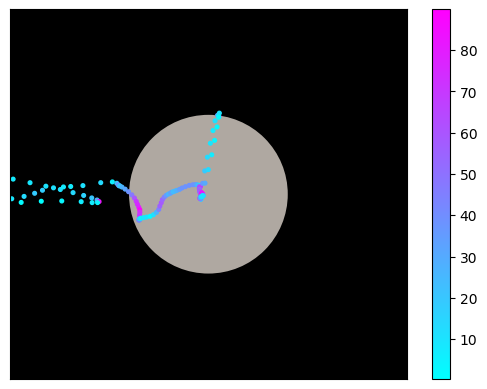

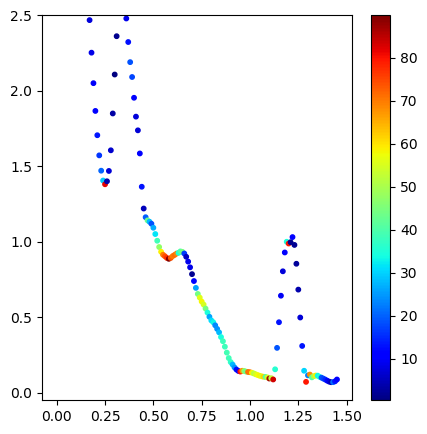

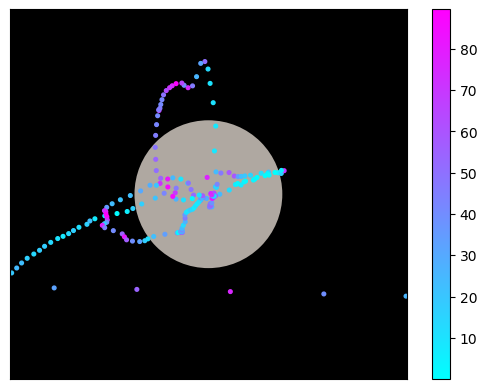

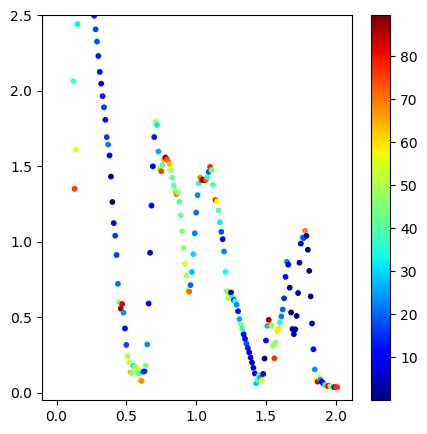

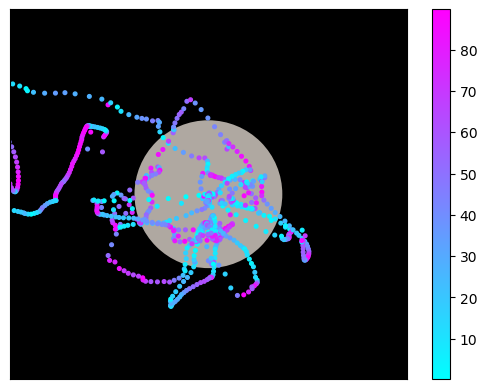

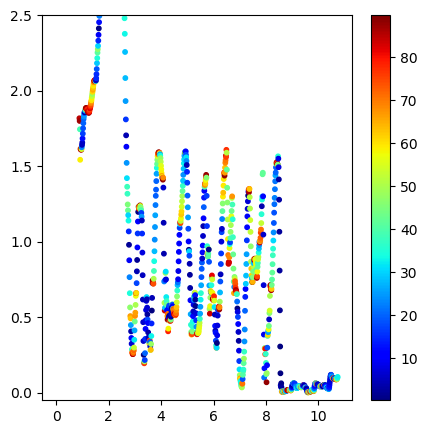

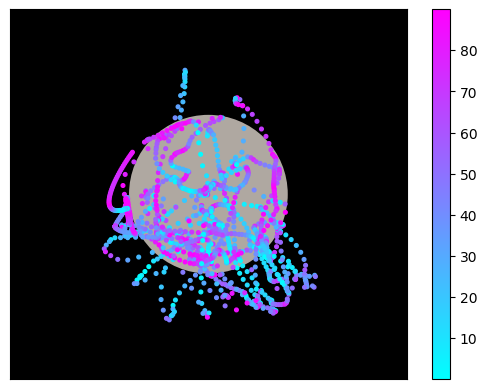

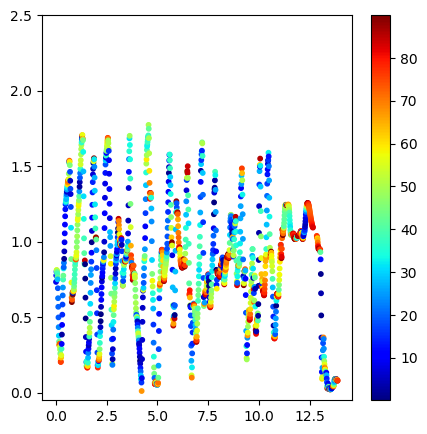

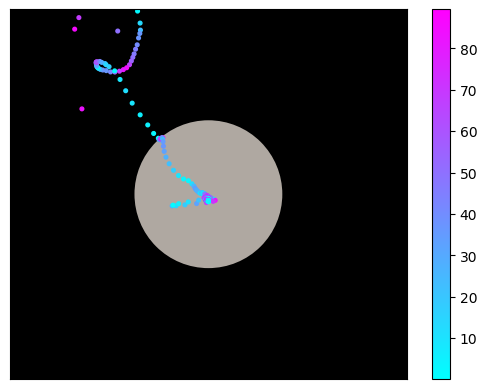

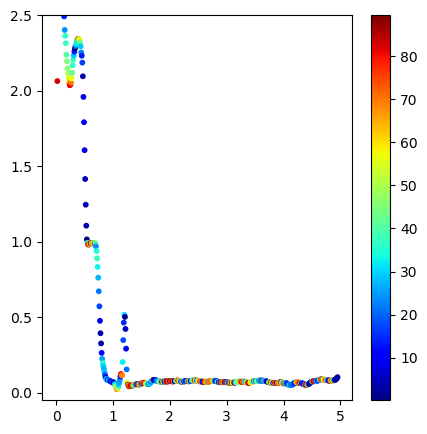

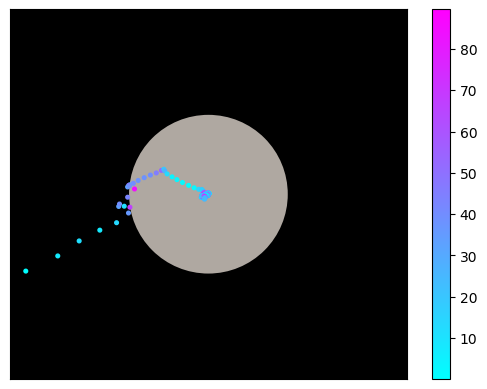

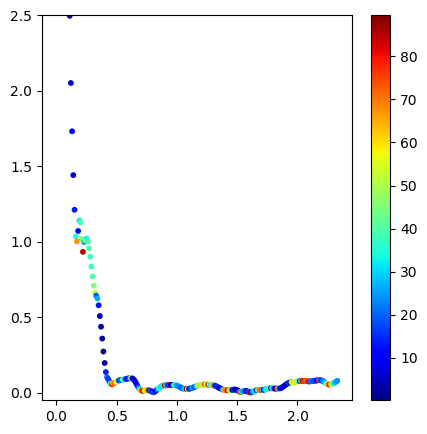

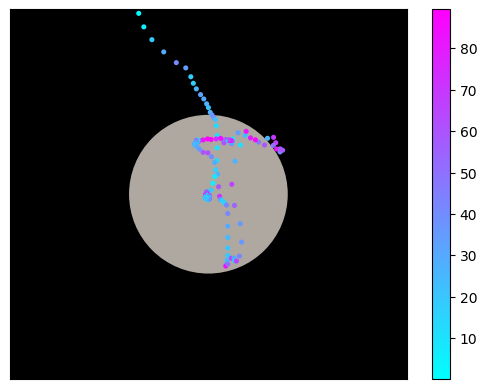

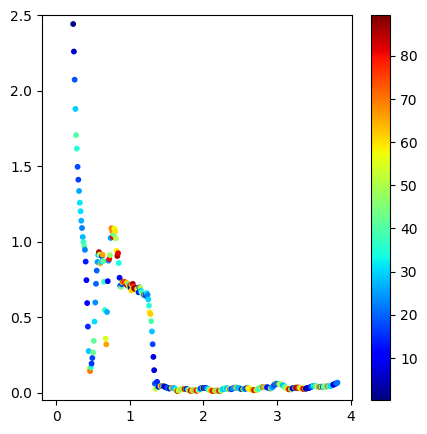

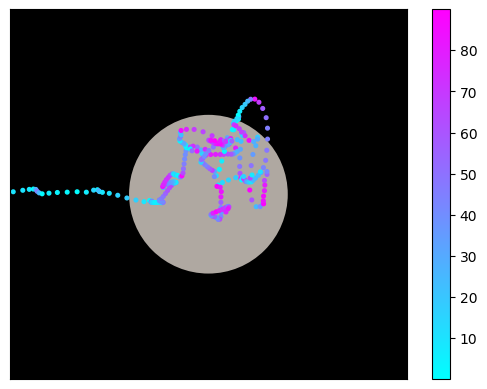

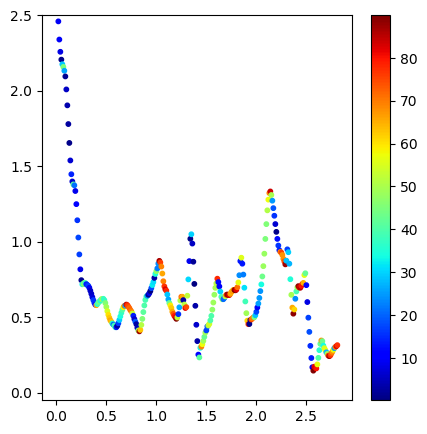

In [47]:
# f1, ax = plt.subplots(1,4, figsize = (15,4), sharex = True, sharey = True)
# ax = ax.ravel()

ii = 0
for visit, n  in zip(visitnum, names):
    print(visit)
    
    direc = os.path.join(r"../dataFolders/PaperPipelineOutput/RadiusAndAngle_v2/", visit)
    datalist = glob.glob(direc + '*.csv')
    
    for name in n:
        print(name)
        data = [f for f in datalist if name in f][0]
        df = pd.read_csv(data)
        
        circ_r = circ_parameters.loc[circ_parameters.mothID == name, 'circ_radii'].values
        
        x = df.loc[:, 'x_centered'].values
        y = df.loc[:, 'y_centered'].values
        r = df.loc[:,'radial_distance_normalized']
        angle = df.loc[:,'angle'].values

        f1 = angleCorloredTrajectory(x, y, circ_r, angle)
        ax1 = f1.gca()
        ax1.set_xlim(-circ_r*2.5, circ_r*2.5)
        ax1.set_ylim(-circ_r*2.5, circ_r*2.5)
        plt.savefig('../dataFolders/PaperPipelineOutput/Figures/v2/projectionOnFlower_forTalk_' + visit[:-1] + '_' + name + '.png')
        
        f2 = angleColoredSweepCurves(r, circ_r, angle)
        ax2 = f2.gca()
        ax2.set_ylim(-0.05, 2.5)
        
        namef2 = '../dataFolders/PaperPipelineOutput/Figures/v2/sweeps_forTalk_' + visit[:-1] + '_' + name + '.png'
        plt.savefig(namef2)
#         plt.savefig('../dataFolders/PaperPipelineOutput/Figures/v2/projectionOnFlower_forTalk_' + visit[:-1] + '_' + name + '.png', f1)